In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset

In [2]:
dataset = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $dataset

--2023-09-25 15:13:50--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv'

     0K .......... .......... .......... .......... ..........  3%  227K 6s
    50K .......... .......... .......... .......... ..........  7%  253K 5s
   100K .......... .......... .......... .......... .......... 10% 2.52M 4s
   150K .......... .......... .......... .......... .......... 14%  254K 4s
   200K .......... .......... .......... .......... .......... 17% 2.26M 3s
   250K .......... .......... .......... .......... .......... 21%  288K 3s
   300K .......... .......... .......... .......... .......... 25% 1.52M 3s
   350K ........

In [23]:
df_housing = pd.read_csv('housing.csv')

In [24]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### EDA

<Axes: xlabel='median_house_value', ylabel='Count'>

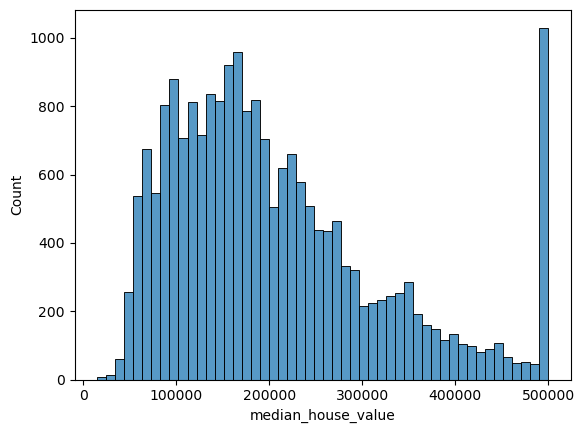

In [25]:
sns.histplot(df.median_house_value, bins = 50)

### Preparing the Dataset

In [29]:
# Filter records based on ocean_proximity
filtered_df = df_housing[df_housing['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

# Select specific columns
selected_columns = ['latitude', 'longitude', 'housing_median_age', 
                    'total_rooms', 'total_bedrooms', 'population', 
                    'households', 'median_income', 'median_house_value']

final_dataset = filtered_df[selected_columns]

final_dataset


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


#### Question 1
#### There's one feature with missing values. What is it?

In [33]:
missing_value = final_dataset.isnull().sum()
missing_value

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

#### Question 2
#### What's the median (50% percentile) for variable 'population'?

In [34]:
final_dataset['population'].median()

1195.0

### Prepare and split the dataset
#### Shuffle the dataset (the filtered one you created above), use seed 42.
#### Split your data in train/val/test sets, with 60%/20%/20% distribution.
#### Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [37]:
n = len(final_dataset)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [38]:
n, n_val , n_test , n_train

(15687, 3137, 3137, 9413)

In [39]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [43]:
df_val = df.iloc[idx[:n_val]]
df_test = df.iloc[idx[n_val:n_test+n_val]]
df_train = df.iloc[idx[n_test+n_val:]]

In [48]:
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11078,-117.85,33.80,40.0,1461.0,286.0,1322.0,264.0,4.3269,194100.0,<1H OCEAN
8631,-118.40,33.88,36.0,3022.0,482.0,1278.0,494.0,7.2651,500001.0,<1H OCEAN
10436,-117.61,33.43,33.0,1150.0,383.0,604.0,317.0,2.3545,187500.0,NEAR OCEAN
9037,-117.96,34.71,32.0,3511.0,646.0,1733.0,510.0,3.4600,123900.0,INLAND
2753,-115.49,32.67,25.0,2322.0,573.0,2185.0,602.0,1.3750,70100.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
12207,-116.96,33.52,9.0,2802.0,471.0,1155.0,421.0,4.1250,392100.0,INLAND
3370,-118.27,34.27,27.0,5205.0,859.0,2363.0,888.0,6.1946,276100.0,<1H OCEAN
14760,-117.06,32.56,5.0,2706.0,925.0,3148.0,855.0,1.7301,125000.0,NEAR OCEAN
6903,-118.14,34.04,40.0,1966.0,391.0,1120.0,362.0,3.7109,198800.0,<1H OCEAN


In [49]:
len(df_train), len(df_test), len(df_val)

(9413, 3137, 3137)

In [50]:
df_train=df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test =df_test.reset_index(drop=True)

In [51]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [52]:
del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

In [53]:
len(y_train)

9413

In [54]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-117.81,33.67,24.0,3930.0,661.0,1831.0,616.0,6.3767,<1H OCEAN
1,-117.98,33.84,33.0,2291.0,439.0,1187.0,405.0,3.9539,<1H OCEAN
2,-121.76,36.75,21.0,1141.0,257.0,671.0,195.0,3.8424,<1H OCEAN
3,-118.01,33.85,29.0,3061.0,612.0,2396.0,640.0,4.6326,<1H OCEAN
4,-117.77,33.53,32.0,3116.0,661.0,1105.0,543.0,5.1837,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9408,-118.26,33.93,36.0,1102.0,247.0,702.0,225.0,1.5256,<1H OCEAN
9409,-117.49,34.05,20.0,1483.0,249.0,660.0,194.0,3.9464,INLAND
9410,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
9411,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


#### Question 3
#### We need to deal with missing values for the column from Q1.
#### We have two options: fill it with 0 or with the mean of this variable.
#### Try both options. For each, train a linear regression model without regularization using the code from the lessons.
#### For computing the mean, use the training only!
#### Use the validation dataset to evaluate the models and compare the RMSE of each option.
#### Round the RMSE scores to 2 decimal digits using round(score, 2)
#### Which option gives better RMSE?

In [72]:
check = ['latitude', 'longitude', 'housing_median_age', 
                    'total_rooms', 'total_bedrooms', 'population', 
                    'households', 'median_income']
def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [73]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [74]:
def rmse(y,y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [76]:
mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)
np.round(rmse(y_val, y_mean_pred_val),2)

0.35

In [77]:
X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

np.round(rmse(y_val, y_null_pred_val),2)

0.35

#### Question 4
#### Now let's train a regularized linear regression.
#### For this question, fill the NAs with 0.
#### Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
#### Use RMSE to evaluate the model on the validation dataset.
#### Round the RMSE scores to 2 decimal digits.
#### Which r gives the best RMSE?
#### If there are multiple options, select the smallest r.

In [78]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [79]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 -9.367192750636956 0.35
1e-06 -9.367171055342512 0.35
0.0001 -9.36502374968625 0.35
0.001 -9.345547837832118 0.35
0.01 -9.155151898321607 0.35
0.1 -7.605563385826297 0.35
1 -2.8233192907465092 0.35
5 -0.7420333116052416 0.35
10 -0.38493145490981595 0.35


#### Question 5
#### We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
#### Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
#### For each seed, do the train/validation/test split with 60%/20%/20% distribution.
#### Fill the missing values with 0 and train a model without regularization.
#### For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
#### What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
#### Round the result to 3 decimal digits (round(std, 3))
#### What's the value of std?

#### 0.5
#### 0.05
#### 0.005
#### 0.0005
#### Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [81]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -9.633816752154653 0.35
1 -9.477881071612131 0.34
2 -9.919829307091968 0.35
3 -8.847031305620217 0.34
4 -9.922809779922465 0.35
5 -8.793636777581119 0.34
6 -9.315504804447798 0.35
7 -9.620843227556634 0.34
8 -9.544435598260163 0.34
9 -8.881111587783078 0.34


In [82]:
rmse_list

[0.35, 0.34, 0.35, 0.34, 0.35, 0.34, 0.35, 0.34, 0.34, 0.34]

In [83]:
np.round(np.std(rmse_list),3)

0.005

#### Question 6
#### Split the dataset like previously, use seed 9.
#### Combine train and validation datasets.
#### Fill the missing values with 0 and train a model with r=0.001.
#### What's the RMSE on the test dataset?
#### Options:
#### 0.13
#### 0.23
#### 0.33
#### 0.43

In [85]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['median_house_value']
del df_test['median_house_value']

In [88]:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.35